In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 17.9 MB/s eta 0:00:00


In [ ]:
!pip install opencv-python -y
!pip install opencv-python-headless==4.1.2.30


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -y
ERROR: Ignored the following yanked versions: 3.4.11.39, 3.4.11.41, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.5.5.62, 4.7.0.68, 4.8.0.74
ERROR: Could not find a version that satisfies the requirement opencv-python-headless==4.1.2.30 (from versions: 3.4.10.37, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.64, 4.6.0.66, 4.7.0.72, 4.8.0.76, 4.8.1.78, 4.9.0.80, 4.10.0.82, 4.10.0.84)
ERROR: No matching distribution found for opencv-python-headless==4.1.2.30


In [ ]:
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import cv2
import time
from easyocr import Reader
from pylab import rcParams
from IPython.display import Image
import pandas as pd
import numpy as np
from skimage.filters import threshold_local
import imutils


In [ ]:
def imshow(title="Image",image=None,size=10):
  w,h=image.shape[0],image.shape[1]
  aspect_ratio=w/h
  plt.figure(figsize=(size*aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

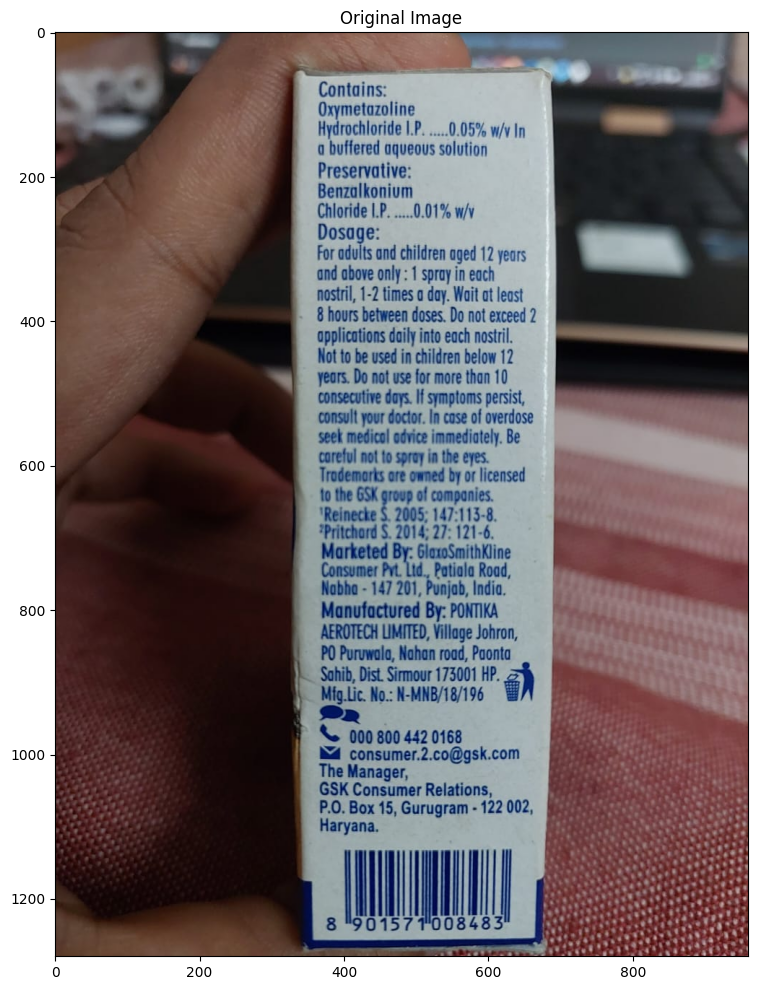

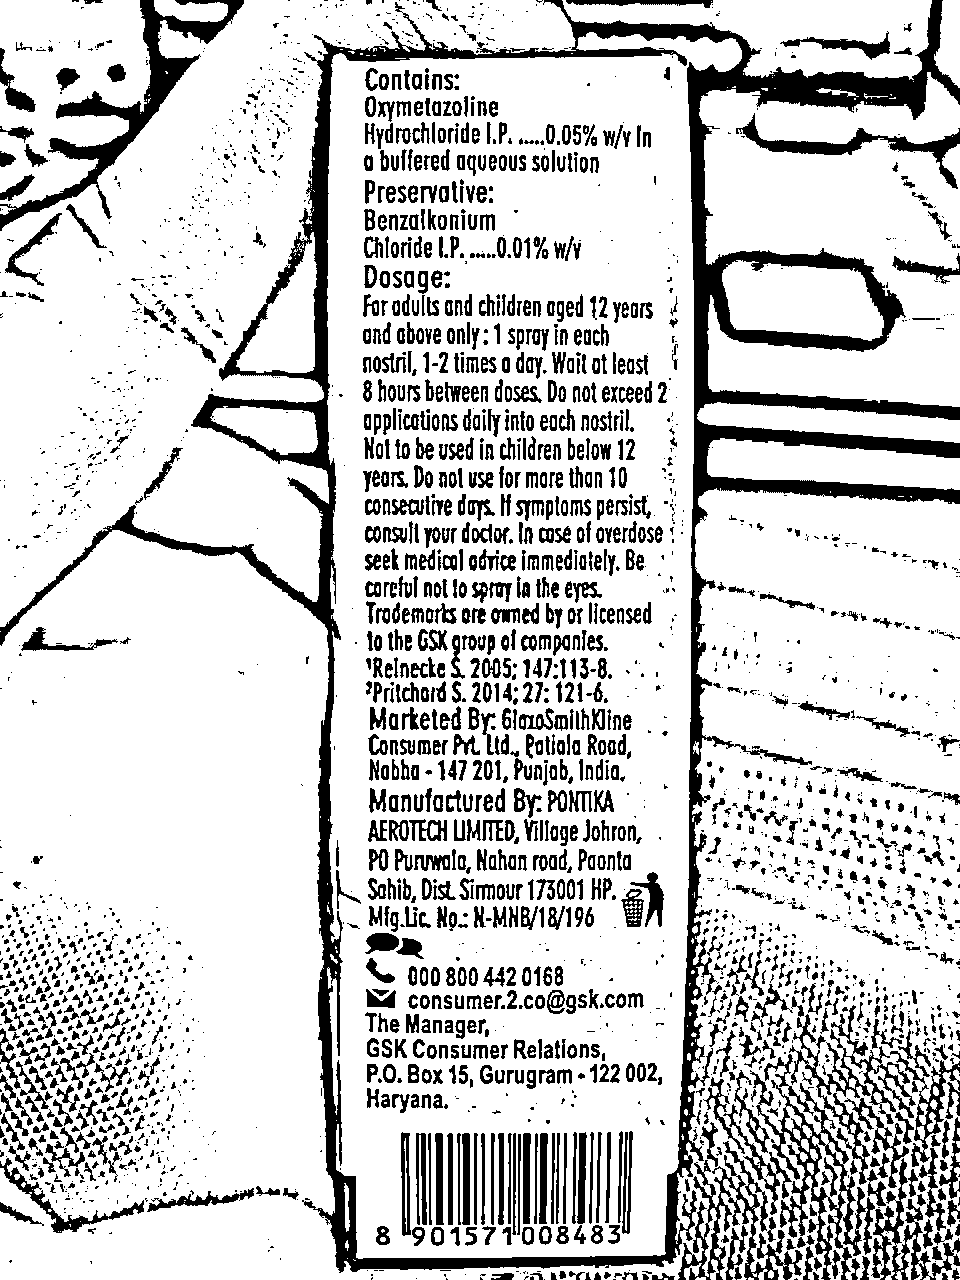

In [ ]:
image=cv2.imread('/content/WhatsApp Image 2024-10-16 at 12.26.41 AM.jpeg')
imshow("Original Image",image,size=12)

V=cv2.split(cv2.cvtColor(image,cv2.COLOR_BGR2HSV))[2]
T=threshold_local(V,45,offset=5,method="gaussian")
thresh=(V>T).astype("uint8")*255
#thresholded=cv2.bitwise_not(thresholded)
cv2_imshow(thresh)

In [ ]:
reader=Reader(['en'],gpu=False)
start=time.time()
result=reader.readtext(image)
end=time.time()
time_taken=end-start
print(f"Time Taken: {time_taken}")
print(result)

Time Taken: 30.154755353927612
[([[360, 64], [466, 64], [466, 96], [360, 96]], 'Contains:', 0.9981922480873546), ([[360, 92], [504, 92], [504, 124], [360, 124]], 'Oxymetazoline', 0.9928323021712818), ([[358, 114], [515, 114], [515, 153], [358, 153]], 'Hydrochloride LP', 0.8786424715011555), ([[544, 120], [656, 120], [656, 150], [544, 150]], '0.05% wlv In', 0.6511967095164276), ([[376, 146], [604, 146], [604, 178], [376, 178]], 'buflered aqueous solution', 0.4911983966644101), ([[360, 176], [500, 176], [500, 208], [360, 208]], 'Preservative:', 0.9992096166382091), ([[360, 206], [502, 206], [502, 236], [360, 236]], 'Benzalkonium', 0.9912137085750232), ([[358, 232], [466, 232], [466, 264], [358, 264]], 'Chloride LP:', 0.6747638572968794), ([[494, 232], [586, 232], [586, 264], [494, 264]], '0.01% wlv', 0.7816248258416886), ([[357, 258], [457, 258], [457, 298], [357, 298]], 'Dosage:', 0.999304739406279), ([[357, 289], [659, 289], [659, 325], [357, 325]], 'For oduits ond children aged 12 yeo

In [ ]:
recognized_text=[item[1] for item in result]
#print(recognized_text)
'''for text in recognized_text:
  print(f"{text}")'''
final_text=" ".join(recognized_text)
print(final_text)

Contains: Oxymetazoline Hydrochloride LP 0.05% wlv In buflered aqueous solution Preservative: Benzalkonium Chloride LP: 0.01% wlv Dosage: For oduits ond children aged 12 yeors ond above only = sproy in each nostril, 1-2 times @ doy: Woit ot least 8 hours between doses. Do not exceed 2 gpplicotions doily into each nostril, Hot to be used in children below 12 yeors Do not use for more thon 10 consecutive dops I symploms persist; consult your doctor; In case o/ overdose seek medicol adrice immediately: Be coreful not Yo sproy in Ihe eyes Trodemorts ore ouned Dy or licensed to the GSK grovp ol companies: 'Reinecke $ 2005; 447.115-8, "Prilchord $2014,27: 421-6, Marketed By: GlatoSmithKline Consumer Fol Lid _ Paliala Road, Nobho 147 201, Punjob, India. Manufactured By: POHTIKA AEROTECH LMIED, Villoge Johron, PO Puruwolo; Nohon rood, Paonta Sohib; Dist  Sirmour 173001 HP: Mig Lic. Ho:: H-MNB/18/196 000 800 442 0168 consumer 2 co@gsk.com The Manager; GSK Consumer Relations, PO. Box 15, Gurugra

In [ ]:
pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00


In [ ]:
from groq import Groq

GROQ_API_KEY= "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"
client = Groq(api_key=GROQ_API_KEY)
completion = client.chat.completions.create(
    model="llama3-8b-8192",
    messages=[{"role": "user", "content": f"Organize and clean up the following text into a proper readable format with appropriate sections:\n\n{final_text}"}],
    temperature=1,
    max_tokens=1024,
    top_p=1,
    stream=True,
    stop=None,
)

for chunk in completion:
    print(chunk.choices[0].delta.content or "", end="")


Here is the cleaned-up text organized into a proper readable format with appropriate sections:

**Product Information**

* Contains: Oxymetazoline Hydrochloride LP 0.05% w/v in a buffered aqueous solution
* Preservative: Benzalkonium Chloride LP 0.01% w/v

**Dosage and Usage**

* For adults and children aged 12 years and above only
* Spray 1-2 times a day into each nostril
* Wait at least 8 hours between doses
* Do not exceed 2 applications daily into each nostril
* Not to be used in children below 12 years
* Do not use for more than 10 consecutive days. If symptoms persist, consult your doctor.

**Precautions**

* Be careful not to spray in the eyes
* In case of overdose, seek medical advice immediately

**Company Information**

* Marketed by: GlaxoSmithKline Consumer Healthcare Lid, Paliala Road, Noida 147 201, Punjab, India
* Manufactured by: POHTIKA AEROTECH LIMITED, Village Johron, PO Puruwalok, Nahan Road, Paonta Sahib; District Sirmour 173001 HP
* License Number: H-MNB/18/196 00